# News Filter Model

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing DataSet

In [ ]:
dataset = pd.read_csv('news_dataset.csv')

## Taking Care of Missing Data

In [ ]:
# Fill missing values with an empty string
dataset['text'].fillna('', inplace=True)

## Analysing the Data

In [ ]:
dataset.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [ ]:
# Analysing Fake patterns using Word Cloud
fake_news_texts = dataset[dataset['label'] == 'FAKE']['text'].astype(str)
fake_news_words = ' '.join(fake_news_texts)
wordcloud = WordCloud(width=800, height=600, background_color='black').generate(fake_news_words)

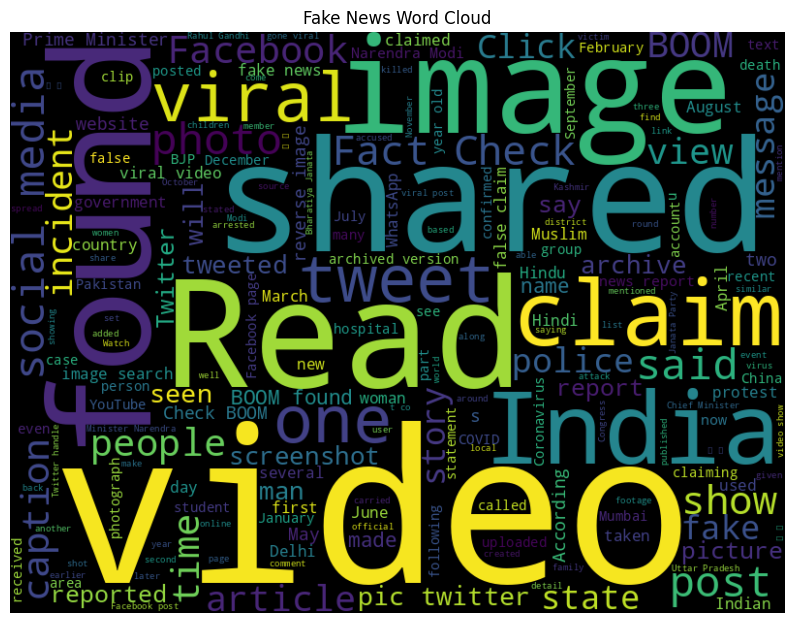

In [ ]:
# Plotting Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

In [ ]:
dataset.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3729 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [ ]:
dataset.describe()

,label,text
count,3729,3729
unique,2,2230
top,FAKE,Highest IPL score in Dubai\n\nMilestones to wa...
freq,1877,79


In [ ]:
dataset.sample(10)

,label,text
120,REAL,A little Rashid magic on @rashidkhan_19's birt...
1902,FAKE,A viral video on WhatsApp by a little known Hi...
1021,FAKE,A viral message claiming state-run news outlet...
1911,REAL,"NEW DELHI: As many as 21 states, mostly ruled ..."
1963,REAL,Payal has accused filmmaker Anurag Kashyap of ...
3593,REAL,Read Also\n\nRead Also\n\nAdvocate Ishkaran Bh...
2576,FAKE,U.S. President Donald Trump retweeted three an...
1179,FAKE,A video with a caption claiming a 'Saudi Princ...
1050,REAL,Highest IPL score in Dubai\n\nMilestones to wa...
1780,REAL,Many things will have to work out to end the c...


## DataSet Classification

In [ ]:
# Using TF-IDF vectorizer for Analyzing Categorial data
tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(dataset['text'])
y = dataset['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Building a Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Prediction and Accuracy Analysis

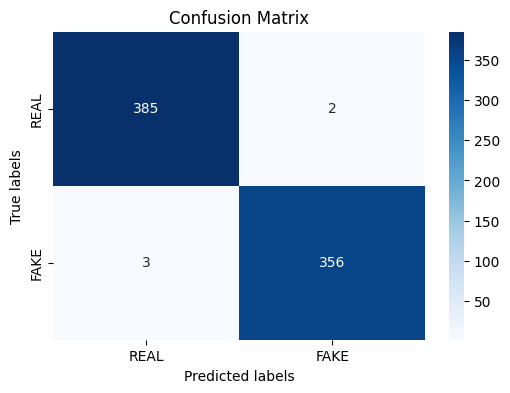

In [ ]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Implementating Model on Given Data

In [ ]:
df = pd.read_csv("Top100.csv")
def remove_irrelevant(text):
    index = text.find(":")
    if index != -1:
        return text[index+1:].strip()
    else:
        return text

df['Headline'] = df['Headline'].apply(remove_irrelevant)
df.to_csv("cleaned_dataset.csv", index=False)

pred_dataset = pd.read_csv('cleaned_dataset.csv')

def scan_and_save(pred_dataset):
  real_news = []
  fake_news = []
  for i in range(len(pred_dataset)):
    text = pred_dataset.iloc[i]['Headline']
    transformed_text = tfidf.transform([text])
    prediction = model.predict(transformed_text)[0]
    if prediction == 'REAL':
      real_news.append(pred_dataset.iloc[i])
    else:
      fake_news.append(pred_dataset.iloc[i])

  new_dataset = pd.DataFrame(real_news)
  new_dataset.to_csv('real_news.csv', index=False)
  new_dataset.to_csv('fake_news.csv', index=False)

scan_and_save(pred_dataset)

In [ ]:
df = pd.read_csv("Top100.csv")
def remove_irrelevant(text):
    index = text.find(":")
    if index != -1:
        return text[index+1:].strip()
    else:
        return text

df['Headline'] = df['Headline'].apply(remove_irrelevant)
df.to_csv("cleaned_dataset.csv", index=False)